# Zbiory danych treningowych

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
from collections import Counter
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns

CURR_FILE_NAME = "test.csv" # or test.csv
TARGET_CLASS_NAME = "satisfaction"

colors = ["#0101DF", "#DF0101"]

In [121]:

def load_data(path):
  if path is None or path == "":
    raise ValueError("Dataset path is invalid")
  elif not os.path.exists(path):
    raise FileNotFoundError(f"Dataset not found at path: {path}")

  train_path = os.path.join(path, CURR_FILE_NAME)

  return pd.read_csv(train_path)

In [122]:
def plot_distributions(df, class_names):
  for class_name in class_names:
    df_frist_class = df[class_name]
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    sns.distplot(df_frist_class.values, ax=ax1, color='r')
    ax1.set_title('Distribution of ' + class_name, fontsize=14)
    ax1.set_xlim([df_frist_class.min(), df_frist_class.max()])
    plt.show()

# Balanced airflight satisfaction



In [123]:
df = load_data("data/raw/binary_balanced_airflight_satisfaction")

In [124]:
#dropping id and unnamed column
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

# Conver all special characters and whitespace  to underscores
df.columns = df.columns.str.replace(r'[^\w\s]', '_').str.replace(r'\s+', '_').str.lower()

df.columns

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/1199417295.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/1199417295.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [125]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:, categorical_indexes] = df.iloc[:, categorical_indexes].astype('category')
df.info()


/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/3669382306.py:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             25976 non-null  category
 1   customer_type                      25976 non-null  category
 2   age                                25976 non-null  int64   
 3   type_of_travel                     25976 non-null  category
 4   class                              25976 non-null  category
 5   flight_distance                    25976 non-null  int64   
 6   inflight_wifi_service              25976 non-null  category
 7   departure_arrival_time_convenient  25976 non-null  category
 8   ease_of_online_booking             25976 non-null  category
 9   gate_location                      25976 non-null  category
 10  food_and_drink                     25976 non-null  category
 11  online_boarding                    25976 

In [126]:
df.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [127]:
df.shape

(25976, 23)

In [128]:
#display sum of cells having null value and column name
null_counts = df.isnull().sum()
max_nulls = null_counts.max()
max_null_col = null_counts[null_counts == max_nulls].index[0] if max_nulls > 0 else "No nulls"
display(f"Maximum null values: {max_nulls} in column: {max_null_col}")
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
df.info()

'Maximum null values: 83 in column: arrival_delay_in_minutes'

Null Values In DataFrame: 83

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             25976 non-null  category
 1   customer_type                      25976 non-null  category
 2   age                                25976 non-null  int64   
 3   type_of_travel                     25976 non-null  category
 4   class                              25976 non-null  category
 5   flight_distance                    25976 non-null  int64   
 6   inflight_wifi_service              25976 non-null  category
 7   departure_arrival_time_convenient  25976 non-null  category
 8   ease_of_online_booking             25976 non-null  category
 9   gate_location                      25976 non-null  category
 10  food_and_drink                     25976 non-null  category
 11  online_boar

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/4199844963.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



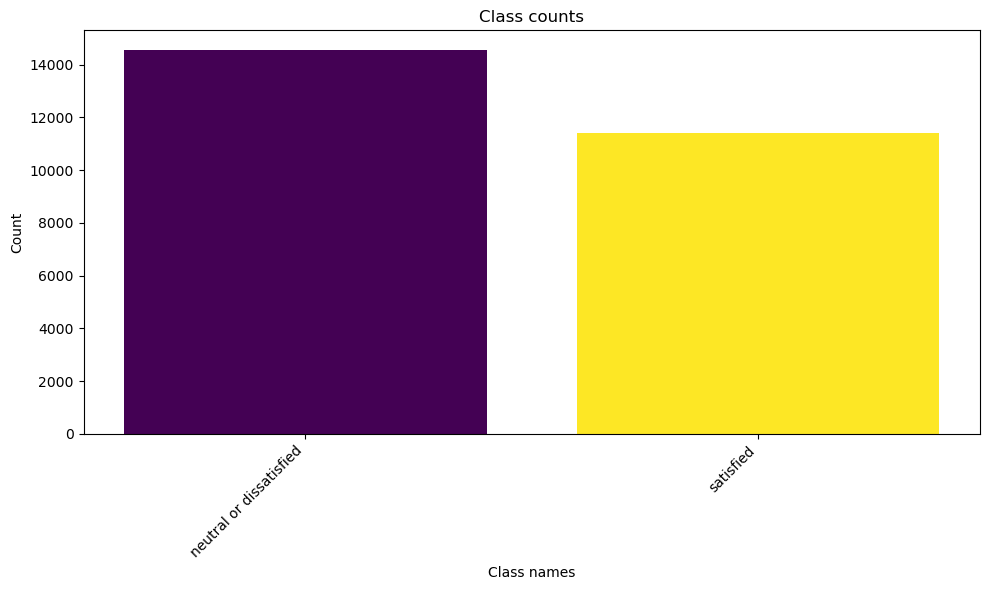

In [129]:
label_col = df[TARGET_CLASS_NAME]

# Plotting data
label_counts = label_col.value_counts()

# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

plt.figure(figsize=(10, 6)) # Create a new figure and set its size
plt.bar(label_counts.index, label_counts.values, color=colors) # Create a bar plot
plt.title('Class counts') # Set the title of the plot
plt.xlabel('Class names') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

In [130]:
df.describe(include='all')

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,25976,25976,25976.000000,25976,25976,25976.000000,25976.0,25976.0,25976.0,25976.0,...,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.00000,25893.000000,25976
unique,2,2,NaN,2,3,NaN,6.0,6.0,6.0,5.0,...,6.0,6.0,6.0,5.0,5.0,6.0,6.0,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,2.0,4.0,2.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,neutral or dissatisfied
freq,13172,21177,NaN,18038,12495,NaN,6490.0,6334.0,6030.0,7140.0,...,7368.0,7836.0,7097.0,9378.0,7278.0,9378.0,6790.0,NaN,NaN,14573
mean,NaN,NaN,39.620958,NaN,NaN,1193.788459,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.30609,14.740857,NaN
std,NaN,NaN,15.135685,NaN,NaN,998.683999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.42316,37.517539,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,849.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1744.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,13.000000,NaN


# Filling missing values

In [131]:
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median(axis = 0), inplace = True)

In [132]:
print(df.isnull().sum())

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/881755835.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




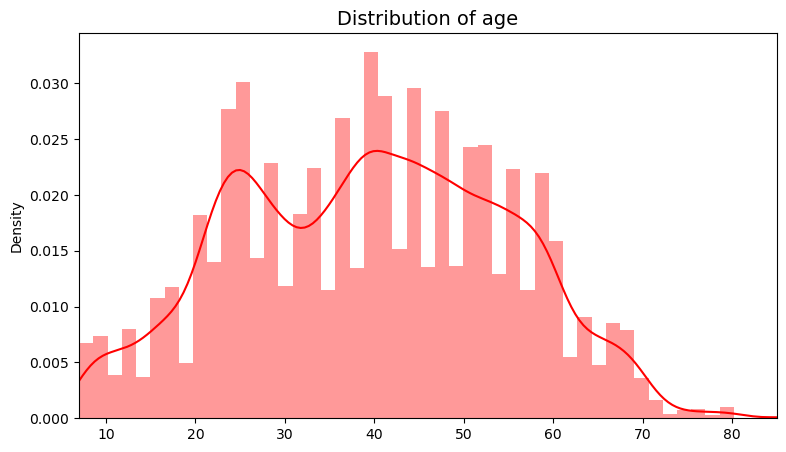

<Figure size 1200x800 with 0 Axes>

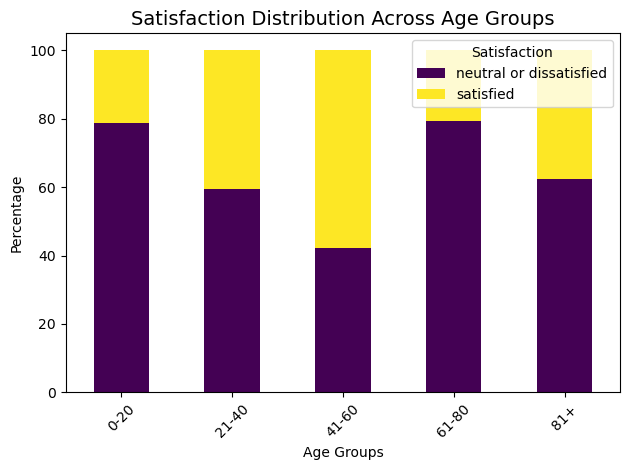

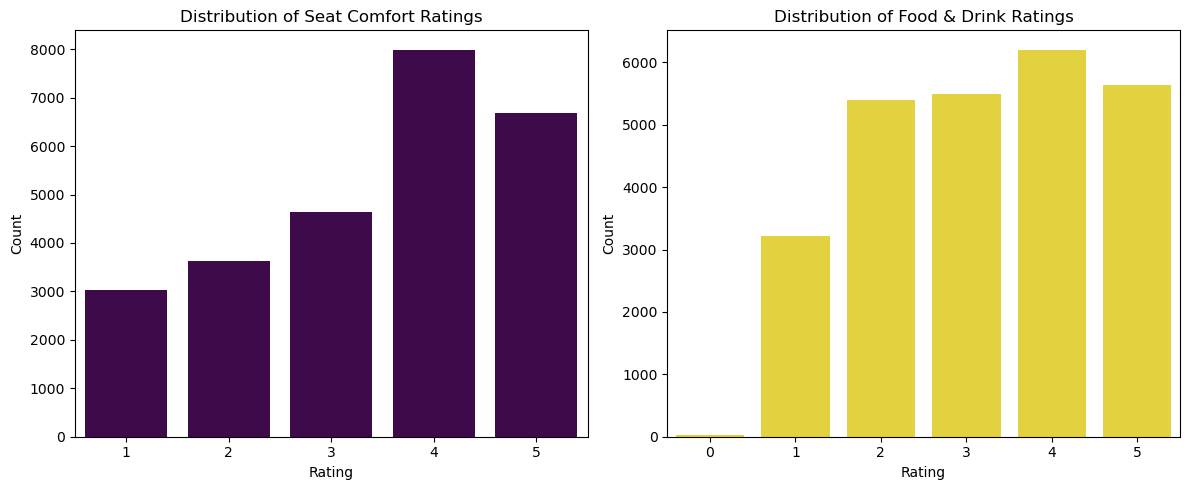

14


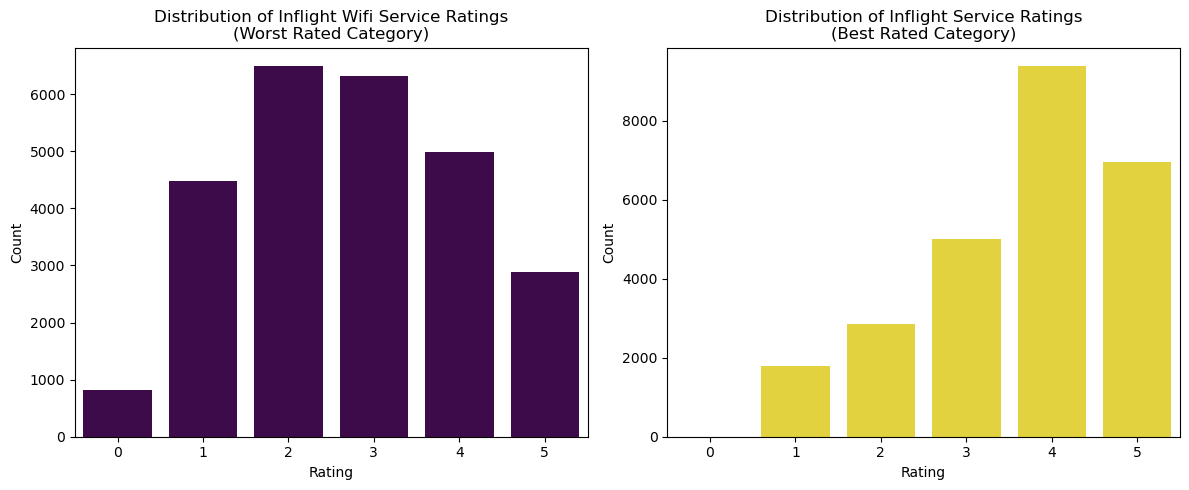

In [133]:
plot_distributions(df, ['age'])

# Create age groups for more detailed analysis
df['age_group'] = pd.cut(df['age'], bins=[0,20,40,60,80,100], labels=['0-20','21-40','41-60','61-80','81+'])

# Plot satisfaction distribution across age groups
plt.figure(figsize=(12,8))
satisfaction_by_age_group = pd.crosstab(df['age_group'], df['satisfaction'], normalize='index') * 100

satisfaction_by_age_group.plot(kind='bar', stacked=True, color=colors)
plt.title('Satisfaction Distribution Across Age Groups', fontsize=14)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop age_group column
df = df.drop('age_group', axis=1)


# Plot distribution of ratings for seat comfort and food/drink
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x='seat_comfort', color=colors[0])
plt.title('Distribution of Seat Comfort Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2) 
sns.countplot(data=df, x='food_and_drink', color=colors[1])
plt.title('Distribution of Food & Drink Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create a pass of size for categorical columns
all_categorical_columns = [col for col in df.columns if df[col].dtype == 'category']
exclude_columns = ['gender', 'type_of_travel', 'customer_type', 'class', 'age', 'flight_distance', 'arrival_delay_in_minutes', 'departure_delay_in_minutes', 'satisfaction']
service_columns = [col for col in all_categorical_columns if col not in exclude_columns]


# Calculate mean rating for each service category
df_numeric = df[service_columns].dropna().astype('int')
service_means = df_numeric.mean().sort_values()
print(len(service_means))
# Get worst and best rated categories
worst_category = service_means.index[0]
best_category = service_means.index[-1]

# Plot distributions
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x=worst_category, color=colors[0])
plt.title(f'Distribution of {worst_category.replace("_"," ").title()} Ratings\n(Worst Rated Category)')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(data=df, x=best_category, color=colors[1]) 
plt.title(f'Distribution of {best_category.replace("_"," ").title()} Ratings\n(Best Rated Category)')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()




/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/781441867.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



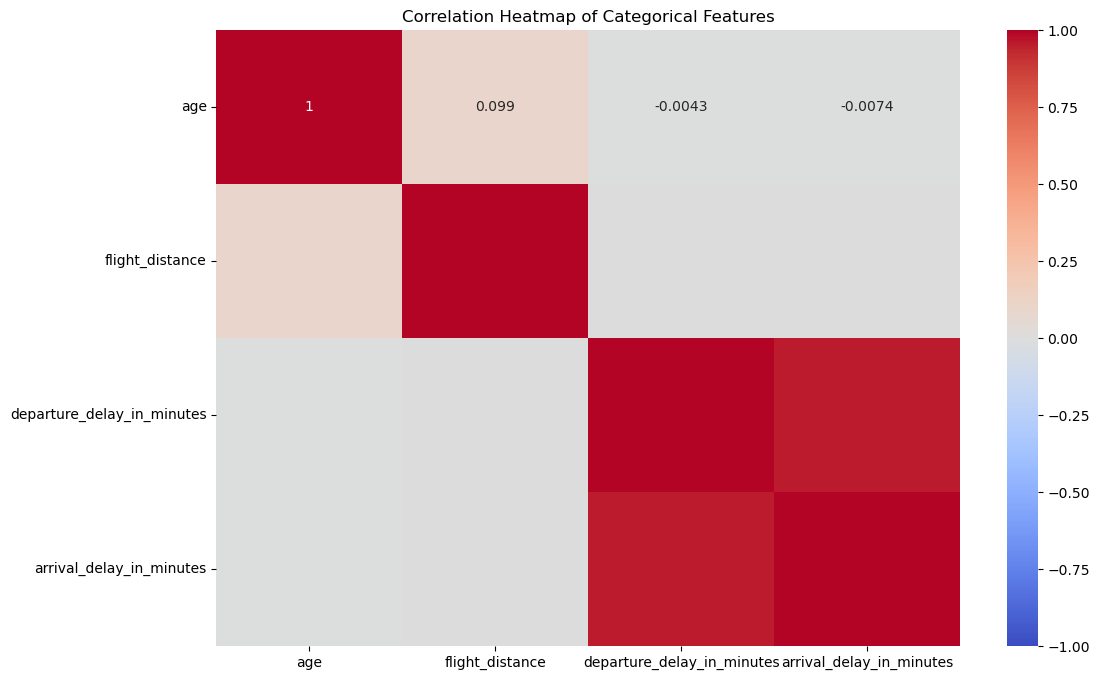

In [134]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Categorical Features')
plt.show()



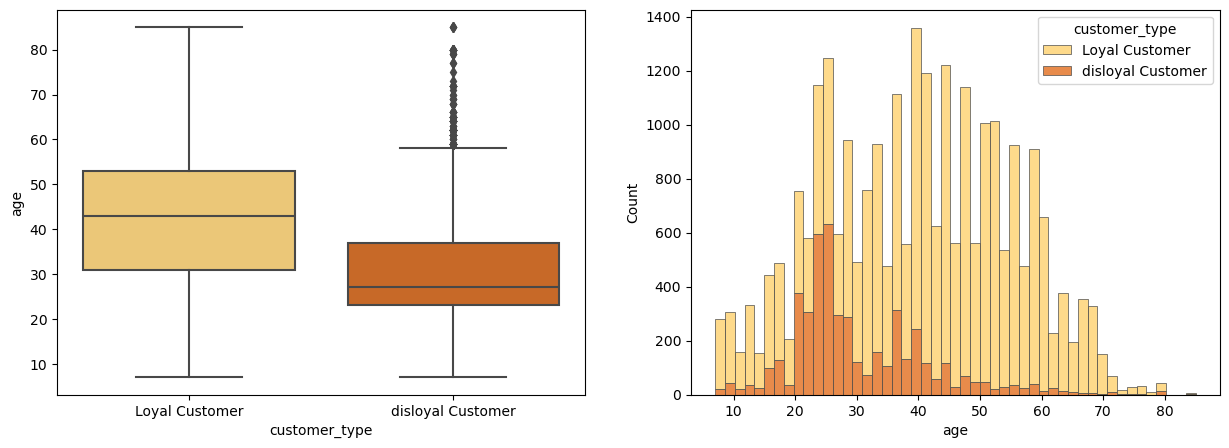

In [135]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "customer_type", y = "age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "age", hue = "customer_type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

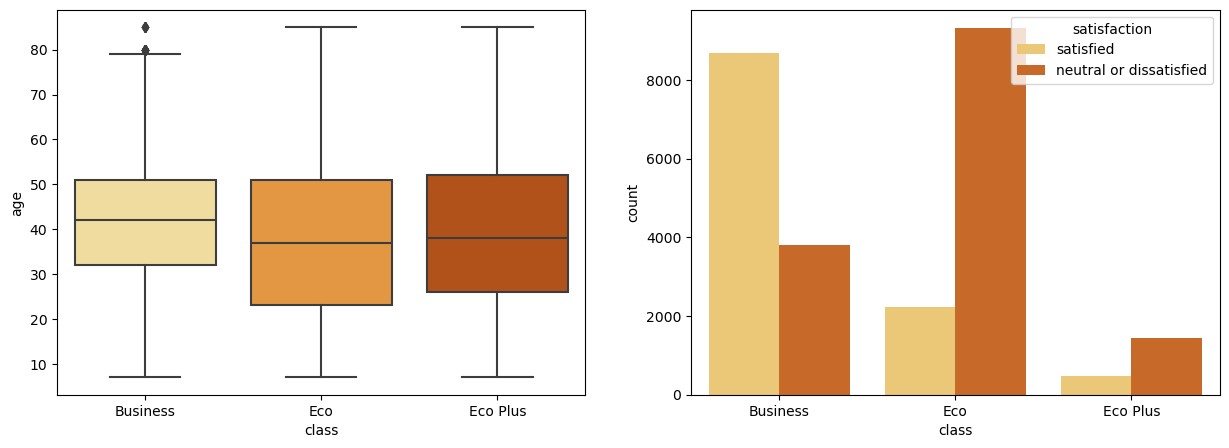

In [136]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "class", y = "age", palette="YlOrBr", data = df, ax = ax[0])
sns.countplot(x = "class", hue = "satisfaction", palette = "YlOrBr", data=df)
pass



In [137]:

from sklearn.preprocessing import LabelEncoder

df = df.dropna(subset=[TARGET_CLASS_NAME])
        # Handle missing values in features
for col in df.columns:
    if col != TARGET_CLASS_NAME:
        if df[col].dtype in ['object', 'category']:
            # Fill categorical missing values with mode
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'unknown')
        else:
            # Fill numerical missing values with median
            df[col] = df[col].fillna(df[col].median())

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le


In [138]:
df.shape

(25976, 23)

# Save processed dataset to CSV

In [139]:
# Save train or test datasets
df.to_csv('data/processed/binary_balanced_airflight_satisfaction/' + CURR_FILE_NAME, index=False)

print("Dataset set shape: ", df.shape)
print("Dataset saved to: ", 'data/processed/binary_balanced_airflight_satisfaction/' + CURR_FILE_NAME)

Dataset set shape:  (25976, 23)
Dataset saved to:  data/processed/binary_balanced_airflight_satisfaction/test.csv
